# CLASE 3: Regresión Lineal y logística

In [73]:
import utils, pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', 50)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Linear Regression

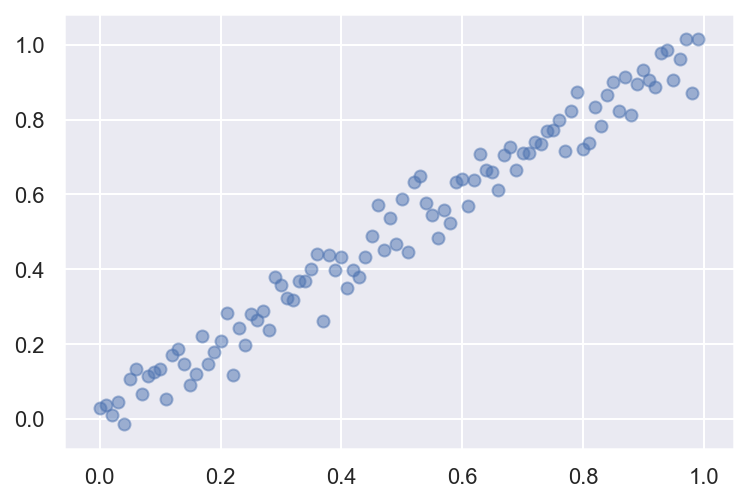

In [180]:
x = np.arange(100)/100
y = x + np.random.normal(scale=0.05, size=100)

plt.scatter(x, y, alpha=0.5);

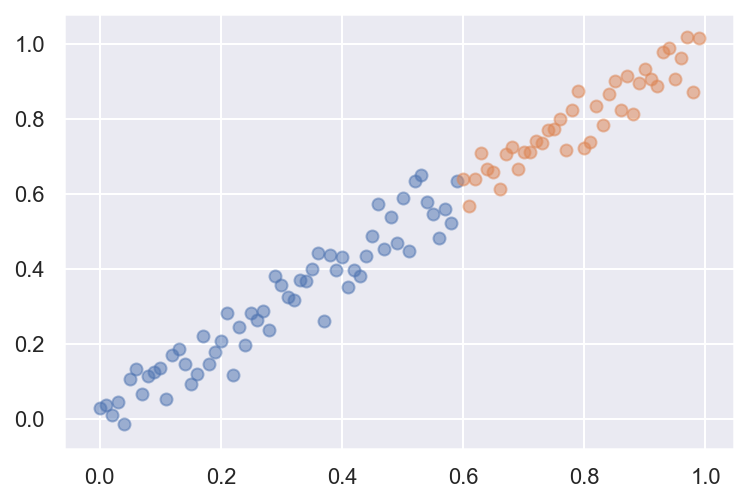

In [196]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, shuffle=False)
plt.scatter(x_train, y_train, alpha=0.5)
plt.scatter(x_val, y_val, alpha=0.5);

In [197]:
x_train = x_train[:, None]
x_val = x_val[:, None]

In [198]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [209]:
def score():
    print(f'Scores:')
    print(f'Train      = {m.score(x_train, y_train):.4}')
    print(f'Validation = {m.score(x_val, y_val):.4}')

In [210]:
score()

Scores:
Train      = 0.1886
Validation = -15.25


In [84]:
pred_train = m.predict(x_train)
pred_val = m.predict(x_val)

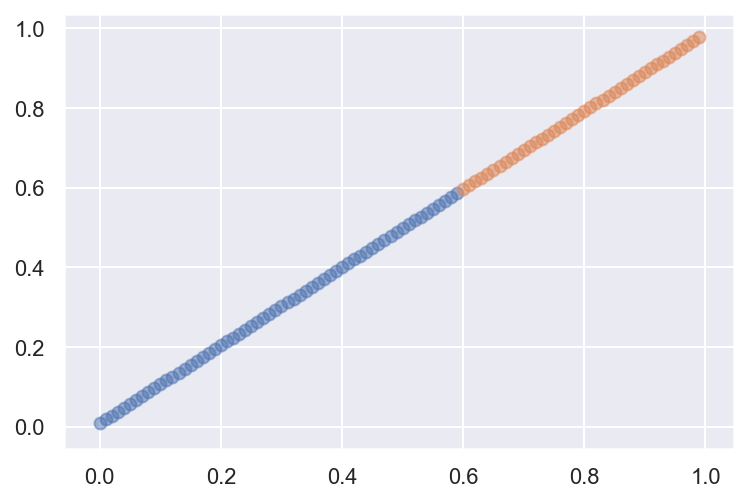

In [92]:
plt.scatter(x_train, pred_train, alpha=0.5)
plt.scatter(x_val, pred_val, alpha=0.5);

## Revisitando House Sales Prediction Dataset

House Sales Prediction Data Set: https://www.kaggle.com/harlfoxem/housesalesprediction/home

Abstract: This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

- **id**: a notation for a house
- **date**: Date house was sold
- **price**: Price is prediction target
- **bedrooms**: Number of Bedrooms/House
- **bathrooms**: Number of bathrooms/bedrooms
- **sqft_living**: square footage of the home
- **sqft_lot**: square footage of the lot
- **floors**: Total floors (levels) in house
- **waterfront**: House which has a view to a waterfront
- **view**: Has been viewed
- **condition**: How good the condition is ( Overall )
- **grade**: overall grade given to the housing unit, based on King County grading system
- **sqft_above**: square footage of house apart from basement
- **sqft_basement**: square footage of the basement
- **yr_built**: Built Year
- **yr_renovated**: Year when house was renovated
- **zipcode**: zip
- **lat**: Latitude coordinate
- **long**: Longitude coordinate
- **sqft_living15**: Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area
- **sqft_lot15**: lotSize area in 2015(implies-- some renovations)

In [211]:
df_raw = pd.read_csv('data/kc_house_data.csv', parse_dates=['date'])
print(df_raw.shape)
df_raw.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Preprocesamiento (Clase 2)

In [212]:
# Borramos la variable "id"
df_raw.drop('id', axis=1, inplace=True)

# Convertimos el target a escala logarítmica
df_raw['price'] = np.log(df_raw.price)

# Obtenemos atributos a partir de la fecha
date_attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear', 'Is_month_end',
             'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']

for n in date_attr:
    df_raw['date_' + n] = getattr(df_raw['date'].dt, n.lower())

df_raw['date_elapsed'] = df_raw['date'].astype(np.int64) // 10 ** 9

df_raw.drop('date', axis=1, inplace=True)

# "date_Is_year_start" tiene el mismo valor para todo el dataset
df_raw.drop('date_Is_year_start', axis=1, inplace=True)

df_raw.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_Year,date_Month,date_Week,date_Day,date_Dayofweek,date_Dayofyear,date_Is_month_end,date_Is_month_start,date_Is_quarter_end,date_Is_quarter_start,date_Is_year_end,date_elapsed
0,12.309982,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10,42,13,0,286,False,False,False,False,False,1413158400
1,13.195614,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12,50,9,1,343,False,False,False,False,False,1418083200
2,12.100712,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2,9,25,2,56,False,False,False,False,False,1424822400
3,13.311329,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12,50,9,1,343,False,False,False,False,False,1418083200
4,13.142166,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2,8,18,2,49,False,False,False,False,False,1424217600


### Train-validation split

In [213]:
from sklearn.model_selection import train_test_split

x = df_raw.drop('price', axis=1)
y = df_raw['price']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (17290, 30)
Validation shape: (4323, 30)


## Usando LinearRegression

In [416]:
from sklearn.linear_model import LinearRegression

m = LinearRegression()
m.fit(x_train, y_train)
score() 

Scores:
Train      = 0.7732
Validation = 0.7734


In [382]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train, m.predict(x_train)), mean_squared_error(y_val, m.predict(x_val))

(0.06245665637464447, 0.06458215566239572)

In [417]:
imp = pd.DataFrame({'col':x_train.columns, 
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
14,lat,1.4045
19,date_Month,0.71356
5,waterfront,0.376282
8,grade,0.156592
4,floors,0.0756293
1,bathrooms,0.0735138
7,condition,0.0634679
6,view,0.0618101
26,date_Is_quarter_end,0.0502135
27,date_Is_quarter_start,0.023173


In [449]:
m.predict(x_val)[1979]

15.297583461092238

In [450]:
m.intercept_

-8.402333323457306

In [291]:
x_val.iloc[0]

bedrooms                          4
bathrooms                      2.25
sqft_living                    2070
sqft_lot                       8893
floors                            2
waterfront                        0
view                              0
condition                         4
grade                             8
sqft_above                     2070
sqft_basement                     0
yr_built                       1986
yr_renovated                      0
zipcode                       98058
lat                         47.4388
long                       -122.162
sqft_living15                  2390
sqft_lot15                     7700
date_Year                      2014
date_Month                       10
date_Week                        41
date_Day                          6
date_Dayofweek                    0
date_Dayofyear                  279
date_Is_month_end             False
date_Is_month_start           False
date_Is_quarter_end           False
date_Is_quarter_start       

In [292]:
x0 = pd.DataFrame(x_val.iloc[0].rename('value'))
x0['col'] = x0.index
x0 = pd.merge(x0, imp, on='col')
x0['contribution'] = x0.value * x0.importance

In [293]:
x0

,value,col,importance,contribution
0,4,bedrooms,-1.153715e-02,-0.0461486
1,2.25,bathrooms,7.351379e-02,0.165406
2,2070,sqft_living,9.708707e-05,0.20097
3,8893,sqft_lot,3.968973e-07,0.00352961
4,2,floors,7.562928e-02,0.151259
5,0,waterfront,3.762816e-01,0
6,0,view,6.181015e-02,0
7,4,condition,6.346791e-02,0.253872
8,8,grade,1.565918e-01,1.25273
9,2070,sqft_above,4.112583e-05,0.0851305


In [294]:
x0.sort_values('contribution', ascending=False).style.bar(['contribution'])

,value,col,importance,contribution
14,47.4388,lat,1.4045,66.6277
15,-122.162,long,-0.136393,16.662
19,10,date_Month,0.71356,7.1356
29,1412553600,date_elapsed,2.34368e-09,3.31057
8,8,grade,0.156592,1.25273
7,4,condition,0.0634679,0.253872
16,2390,sqft_living15,9.78915e-05,0.233961
2,2070,sqft_living,9.70871e-05,0.20097
1,2.25,bathrooms,0.0735138,0.165406
4,2,floors,0.0756293,0.151259


In [296]:
m.intercept_ + x0.contribution.sum()

12.963792256428466

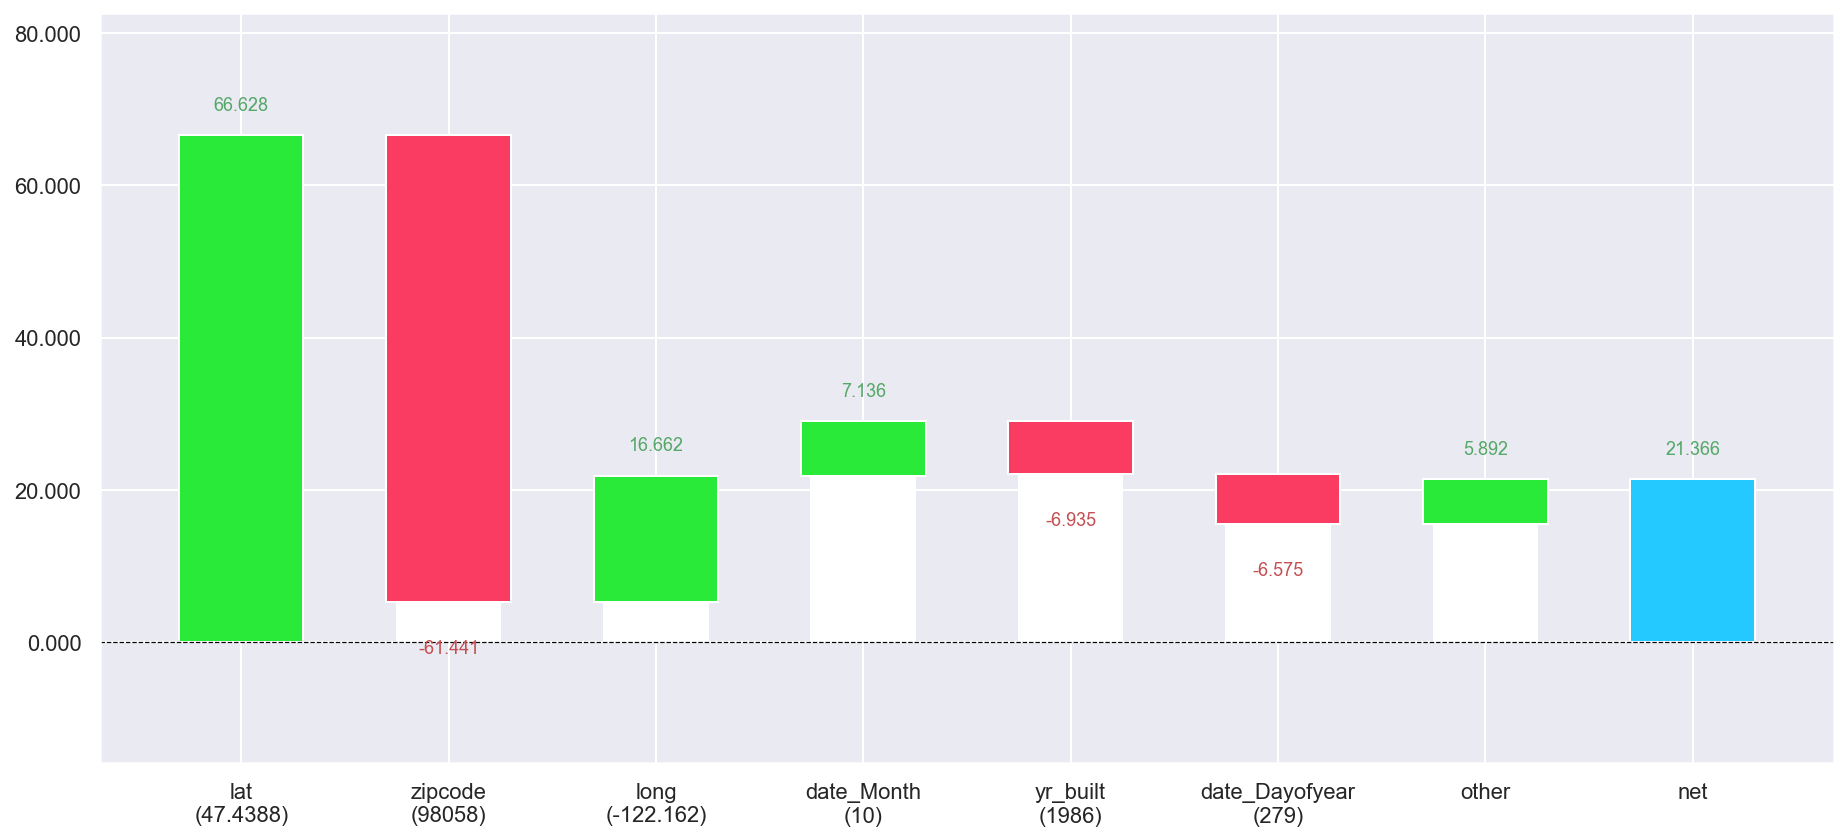

In [295]:
from utils import waterfallplot
waterfallplot(x_val.head(1), x0.contribution, formatting='{:,.3f}', size=(13,6), sorted_value=True, threshold=0.05);

## Usando SGDRegressor (Stochastic Gradient Descent Regressor)

In [451]:
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_y_train = scaler.fit_transform(pd.DataFrame(y_train))
scaled_x_val = scaler.fit_transform(x_val)
scaled_y_val = scaler.fit_transform(pd.DataFrame(y_val))

m = SGDRegressor()
m.fit(scaled_x_train, scaled_y_train.ravel())

print(f'Scores:')
print(f'Train      = {m.score(scaled_x_train, scaled_y_train):.4}')
print(f'Validation = {m.score(scaled_x_val, scaled_y_val):.4}')

Scores:
Train      = 0.7712
Validation = 0.7723


In [385]:
# Veamos el MSE
from sklearn.metrics import mean_squared_error
mean_squared_error(scaled_y_train, m.predict(scaled_x_train)), mean_squared_error(scaled_y_val, m.predict(scaled_x_val))

(0.23039519917581472, 0.22976174986931763)

In [452]:
imp = pd.DataFrame({'col':x_train.columns, 
                    'importance':m.coef_}).sort_values(
    'importance', ascending=False)
imp.style.bar()

,col,importance
14,lat,0.370308
8,grade,0.350785
16,sqft_living15,0.134691
2,sqft_living,0.122101
1,bathrooms,0.110894
9,sqft_above,0.098173
6,view,0.0891055
4,floors,0.0817715
7,condition,0.0777123
10,sqft_basement,0.0686536


In [453]:
a=pd.DataFrame([m.predict(scaled_x_val)[1979]])
scaler.inverse_transform(a).ravel()[0]

15.21882304439811

In [397]:
x0 = pd.DataFrame(scaled_x_val[:1].T,columns=['value'])
x0['col'] = x_val.columns
x0 = pd.merge(x0, imp, on='col')
x0['contribution'] = x0.value * x0.importance

In [398]:
x0

,value,col,importance,contribution
0,0.668693,bedrooms,-0.027419,-0.018335
1,0.167697,bathrooms,0.104160,0.017467
2,-0.035280,sqft_living,0.117264,-0.004137
3,-0.147674,sqft_lot,0.017310,-0.002556
4,0.994363,floors,0.068742,0.068354
5,-0.095413,waterfront,0.056625,-0.005403
6,-0.305261,view,0.095376,-0.029115
7,0.901526,condition,0.074352,0.067030
8,0.276871,grade,0.343794,0.095186
9,0.318609,sqft_above,0.088938,0.028336


In [399]:
x0.sort_values('contribution', ascending=False).style.bar(['contribution'])

,value,col,importance,contribution
8,0.276871,grade,0.343794,0.0951865
4,0.994363,floors,0.0687419,0.0683543
16,0.554253,sqft_living15,0.121424,0.0672998
7,0.901526,condition,0.074352,0.0670303
9,0.318609,sqft_above,0.0889381,0.0283364
13,-0.365244,zipcode,-0.0737584,0.0269398
1,0.167697,bathrooms,0.10416,0.0174674
21,-1.13663,date_Day,-0.0138841,0.0157812
22,-1.37442,date_Dayofweek,-0.0102753,0.0141227
20,1.05049,date_Week,0.00817012,0.00858259


In [408]:
p=m.intercept_ + x0.contribution.sum()

In [409]:
scaler.inverse_transform(pd.DataFrame([p])).ravel()[0]

12.973149690683979

In [410]:
x0.contribution

0    -0.018335
1     0.017467
2    -0.004137
3    -0.002556
4     0.068354
5    -0.005403
6    -0.029115
7     0.067030
8     0.095186
9     0.028336
10   -0.050781
11   -0.102212
12   -0.006177
13    0.026940
14   -0.316181
15   -0.014650
16    0.067300
17    0.003316
18   -0.012326
19    0.003853
20    0.008583
21    0.015781
22    0.014123
23   -0.013581
24    0.000748
25    0.001007
26    0.000156
27   -0.000362
28   -0.000229
29   -0.003271
Name: contribution, dtype: float64

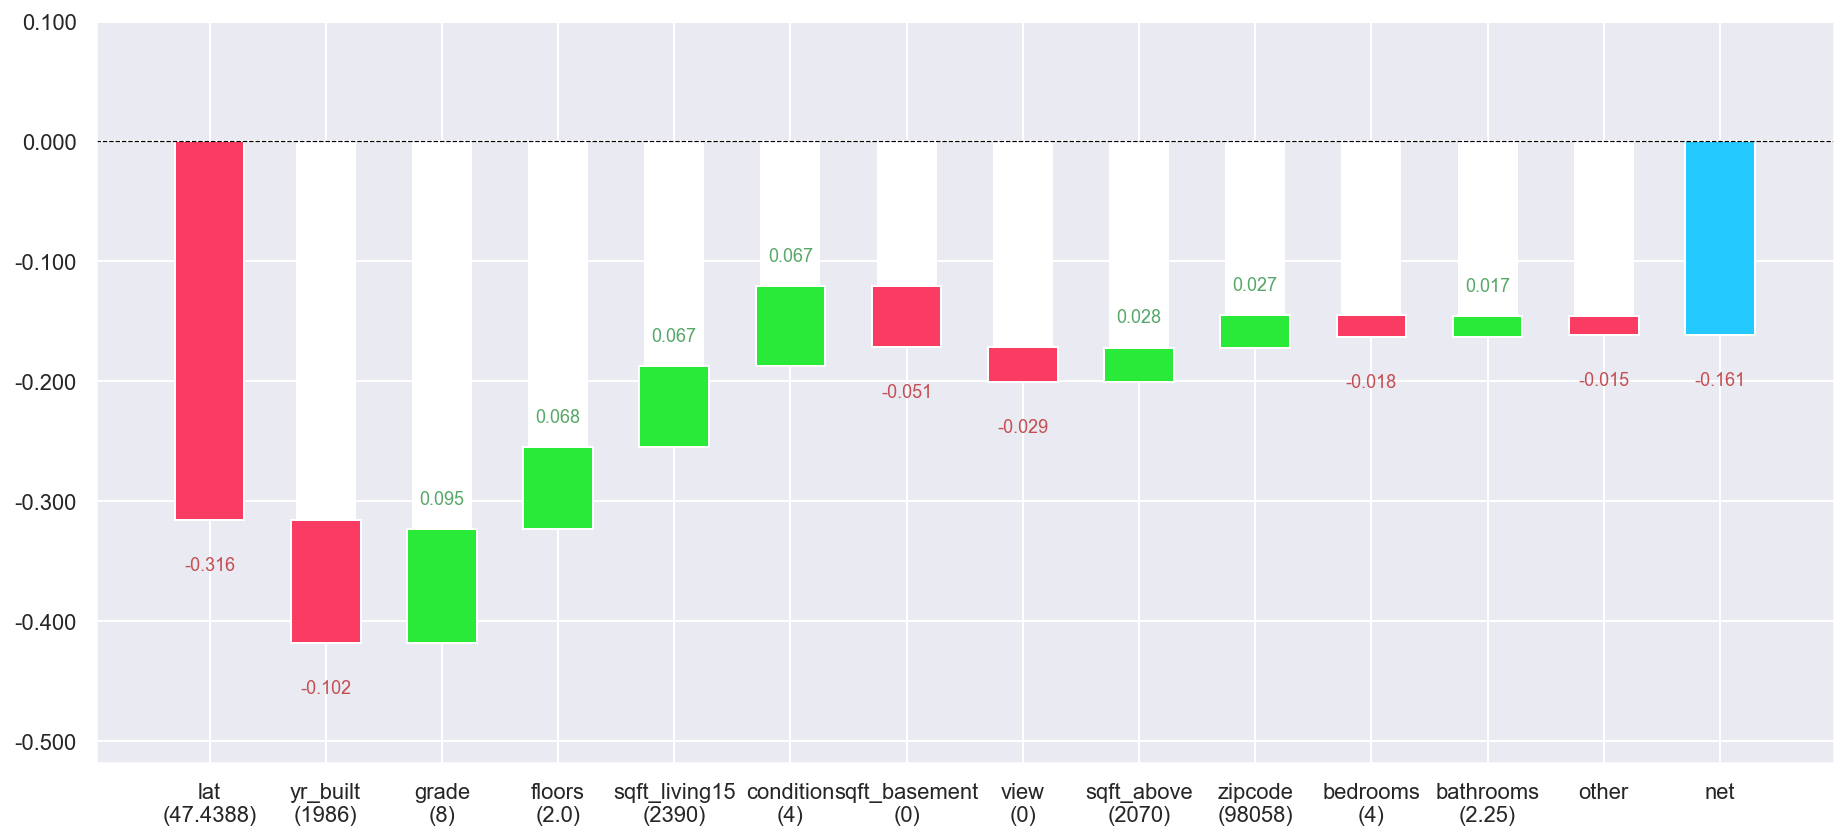

In [411]:
from utils import waterfallplot
waterfallplot(x_val.head(1), x0.contribution, formatting='{:,.3f}', size=(13,6), sorted_value=True, threshold=0.05);

# Logistic Regression

## Revisitando Census Income Dataset

Census Income Data Set: http://mlr.cs.umass.edu/ml/datasets/Census+Income

Abstract: Predict whether income exceeds $50K/yr based on census data. Also known as "Adult" dataset.

* **age:** continuous.
* **workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
* **fnlwgt:** continuous.
* **education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
* **education-num:** continuous.
* **marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
* **occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
* **relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
* **race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
* **sex:** Female, Male.
* **capital-gain:** continuous.
* **capital-loss:** continuous.
* **hours-per-week:** continuous.
* **native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [158]:
df_raw = pd.read_csv('data/census_train.csv')
df_test = pd.read_csv('data/census_test.csv')
print(df_raw.shape, df_test.shape)
df_raw.head(3)

(32561, 15) (16281, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K


### Preprocesamiento (Clase 2)

In [159]:
df_raw = df_raw.drop('education', axis=1) \
                .rename({'education-num': 'education'}, axis=1)

for n, col in df_raw.items():
    if not pd.api.types.is_numeric_dtype(col) and n != 'label':
        # Transforma la variable a tipo category
        df_raw[n] = col.astype('category')
        
df = df_raw.copy()

# Convertir cada columna categórica a numérica
for n,col in df.items():
    if pd.api.types.is_categorical_dtype(col):
        df[n] = col.cat.codes+1
        
df.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,8,77516,13,5,2,2,5,2,2174,0,40,40,<=50K
1,50,7,83311,13,3,5,1,5,2,0,0,13,40,<=50K
2,38,5,215646,9,1,7,2,5,2,0,0,40,40,<=50K
3,53,5,234721,7,3,7,1,3,2,0,0,40,40,<=50K
4,28,5,338409,13,3,11,6,3,1,0,0,40,6,<=50K


### Probando el modelo (holdout validation)

In [160]:
from sklearn.model_selection import train_test_split

x = df.drop('label', axis=1)
y = df['label']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (26048, 13)
Validation shape: (6513, 13)


In [164]:
from sklearn.linear_model import LogisticRegression

m = LogisticRegression(penalty='l2',solver='liblinear')
m.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [165]:
score()

Scores:
Train      = 0.792
Validation = 0.7932


### Probando el modelo (cross validation)

In [130]:
from sklearn.model_selection import KFold
kfolds = KFold(n_splits=5, shuffle=True, random_state=42)

In [131]:
x = df.drop('label', axis=1)
y = df['label']

train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression(penalty='l2',solver='liblinear')
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.7922
Validation = 0.7933

Scores:
Train      = 0.8028
Validation = 0.8076

Scores:
Train      = 0.7951
Validation = 0.7882

Scores:
Train      = 0.8036
Validation = 0.799

Scores:
Train      = 0.7937
Validation = 0.7976

Average Scores:
Train      = 0.7975
Validation = 0.7972


### Variables categóricas: One-hot encoding

In [132]:
df_raw.head()

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,77516,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [133]:
x = df_raw.drop('label', axis=1)
y = df_raw['label']

x = pd.get_dummies(x, drop_first=True)
x.shape

(32561, 85)

In [134]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Variables continuas: Normalización

In [135]:
df_raw['workclass'].dtypes

CategoricalDtype(categories=[' ?', ' Federal-gov', ' Local-gov', ' Never-worked',
                  ' Private', ' Self-emp-inc', ' Self-emp-not-inc',
                  ' State-gov', ' Without-pay'],
                 ordered=False)

In [136]:
cont_cols = [col for col in df_raw if \
             pd.api.types.is_numeric_dtype(df_raw[col])]

In [137]:
cont_cols

['age',
 'fnlwgt',
 'education',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [138]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_x = scaler.fit_transform(x[cont_cols])

In [139]:
for col, scaled_data in zip(cont_cols, scaled_x.T):
    x[col] = scaled_data

In [140]:
x.head()

,age,fnlwgt,education,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,workclass_ Without-pay,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed,occupation_ Adm-clerical,occupation_ Armed-Forces,occupation_ Craft-repair,occupation_ Exec-managerial,occupation_ Farming-fishing,...,native-country_ Hong,native-country_ Hungary,native-country_ India,native-country_ Iran,native-country_ Ireland,native-country_ Italy,native-country_ Jamaica,native-country_ Japan,native-country_ Laos,native-country_ Mexico,native-country_ Nicaragua,native-country_ Outlying-US(Guam-USVI-etc),native-country_ Peru,native-country_ Philippines,native-country_ Poland,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [141]:
train_scores, val_scores = [], []

for train_idx, val_idx in kfolds.split(x):
    x_train, y_train = x.iloc[train_idx], y.iloc[train_idx]
    x_val, y_val = x.iloc[val_idx], y.iloc[val_idx]
    m = LogisticRegression(penalty='l2',solver='liblinear')
    m.fit(x_train, y_train)
    score()
    print()
    train_scores.append(m.score(x_train, y_train))
    val_scores.append(m.score(x_val, y_val))

print('=========================')
print(f'Average Scores:')
print(f'Train      = {np.mean(train_scores):.4}')
print(f'Validation = {np.mean(val_scores):.4}')

Scores:
Train      = 0.8522
Validation = 0.8581

Scores:
Train      = 0.8539
Validation = 0.8504

Scores:
Train      = 0.8532
Validation = 0.8506

Scores:
Train      = 0.8526
Validation = 0.8521

Scores:
Train      = 0.8531
Validation = 0.8497

Average Scores:
Train      = 0.853
Validation = 0.8522


# Principal Component Analysis

In [142]:
sns.set()

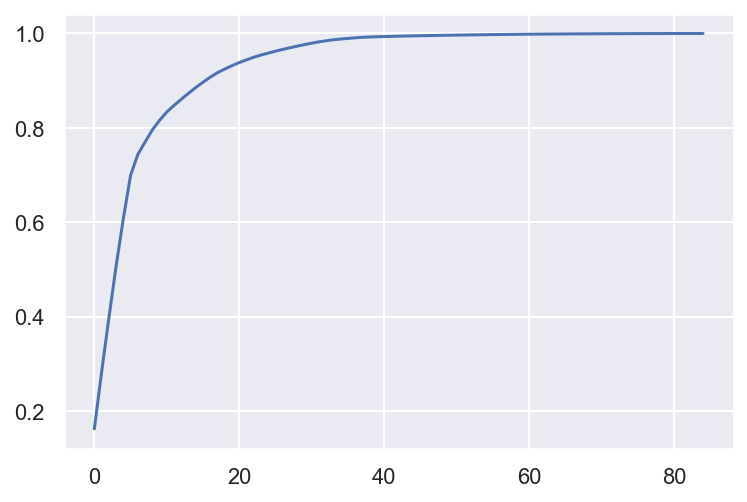

In [143]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [144]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
print(f'Train shape     : {x_train.shape}')
print(f'Validation shape: {x_val.shape}')

Train shape     : (26048, 85)
Validation shape: (6513, 85)


In [145]:
train_pca = pca.transform(x_train)
val_pca   = pca.transform(x_val)

In [146]:
y_train.reset_index(drop=True, inplace=True)
y_val.reset_index(drop=True, inplace=True)

In [147]:
pos_train_idx = np.where(y_train == ' >50K')
neg_train_idx = np.where(y_train == ' <=50K')

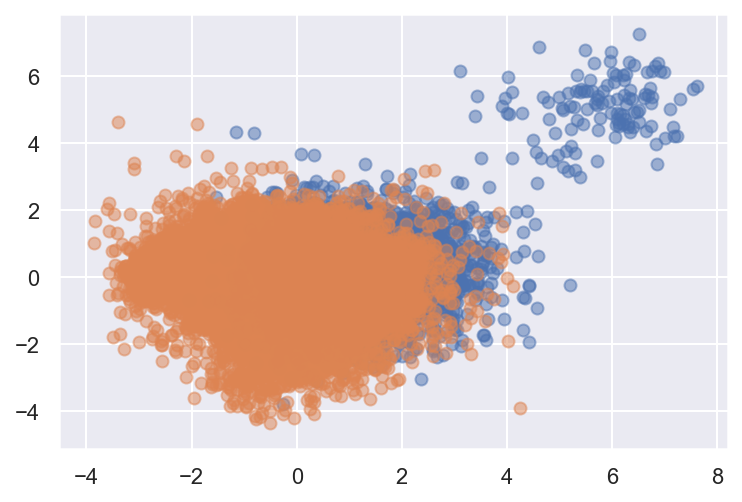

In [148]:
plt.scatter(train_pca[pos_train_idx,0], train_pca[pos_train_idx,1], alpha=0.5)
plt.scatter(train_pca[neg_train_idx,0], train_pca[neg_train_idx,1], alpha=0.5)

In [151]:
pos_val_idx = np.where(y_val == ' >50K')
neg_val_idx = np.where(y_val == ' <=50K')

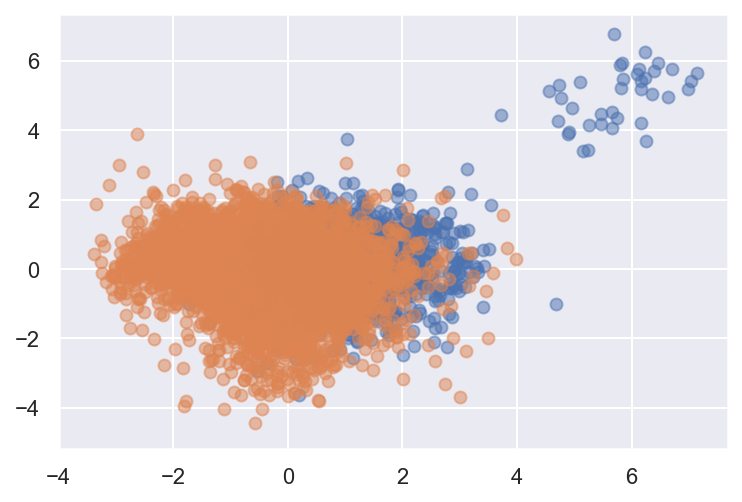

In [152]:
plt.scatter(val_pca[pos_val_idx,0], val_pca[pos_val_idx,1], alpha=0.5)
plt.scatter(val_pca[neg_val_idx,0], val_pca[neg_val_idx,1], alpha=0.5)

In [153]:
m = LogisticRegression(penalty='l2',solver='liblinear')
m.fit(x_train, y_train)
y_pred = m.predict(x_val)

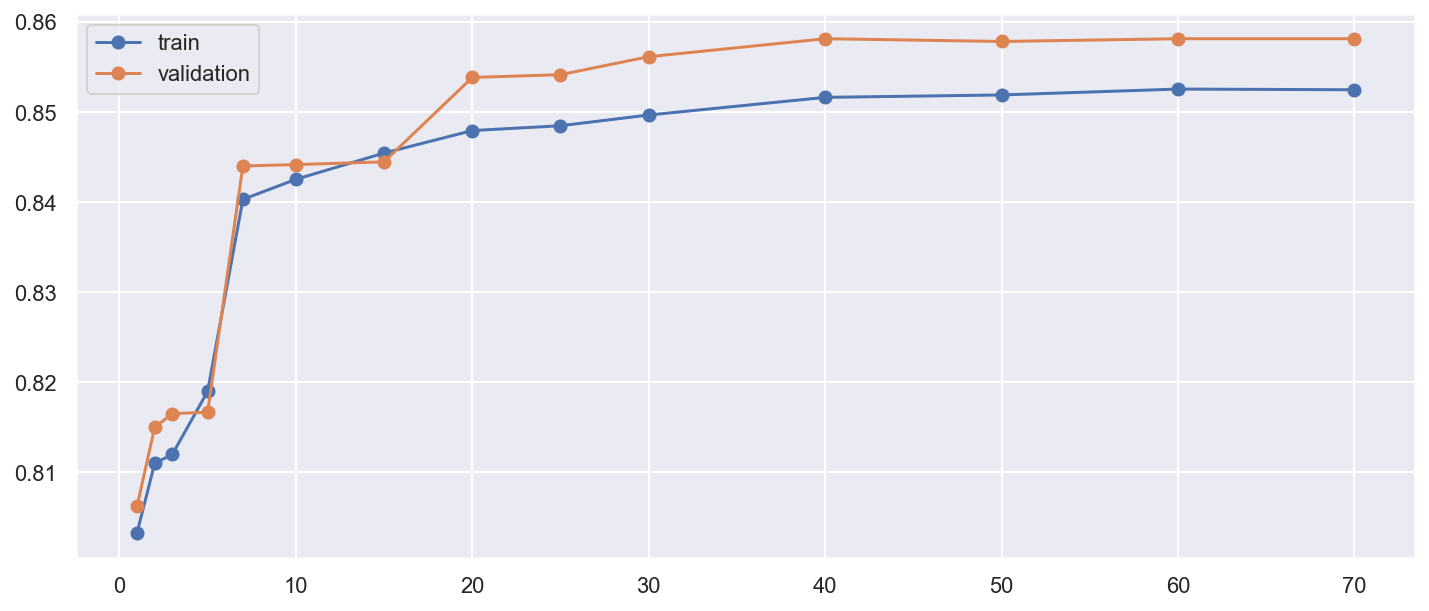

In [154]:
res_trn = []
res_val = []
comps = [1, 2, 3, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60, 70]

for n in comps: 
    m = LogisticRegression(penalty='l2',solver='liblinear')
    m.fit(train_pca[:, :n], y_train)
    res_trn.append(m.score(train_pca[:, :n], y_train))
    res_val.append(m.score(val_pca[:, :n], y_val))


plt.figure(figsize=(12,5))
plt.plot(comps, res_trn, '-o', label='train')
plt.plot(comps, res_val, '-o', label='validation')
plt.legend();

In [155]:
pos_val_idx = np.where(y_pred == ' >50K')
neg_val_idx = np.where(y_pred == ' <=50K')

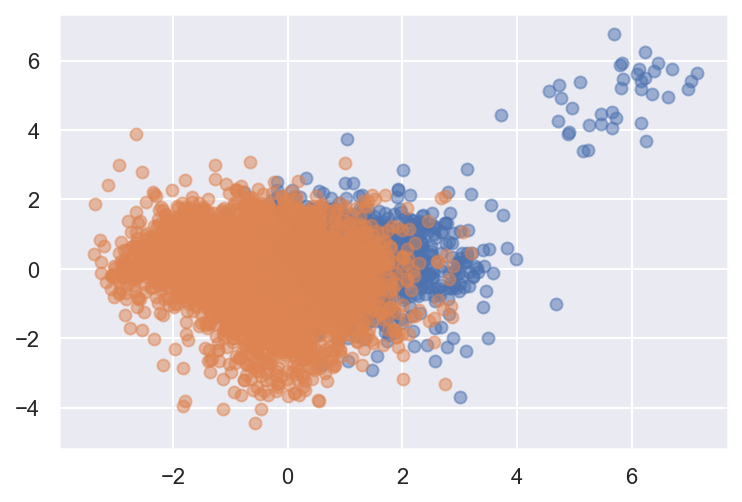

In [157]:
plt.scatter(val_pca[pos_val_idx,0], val_pca[pos_val_idx,1], alpha=0.5)
plt.scatter(val_pca[neg_val_idx,0], val_pca[neg_val_idx,1], alpha=0.5)